# Fun with histograms
> 1d and 2d histograms

![](histograms.png)

## Introduction

This code produces the figure above. I tried to showcase a few things one can do with 1d and 2d histograms.


## The code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import scipy.special
from scipy.optimize import curve_fit
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)

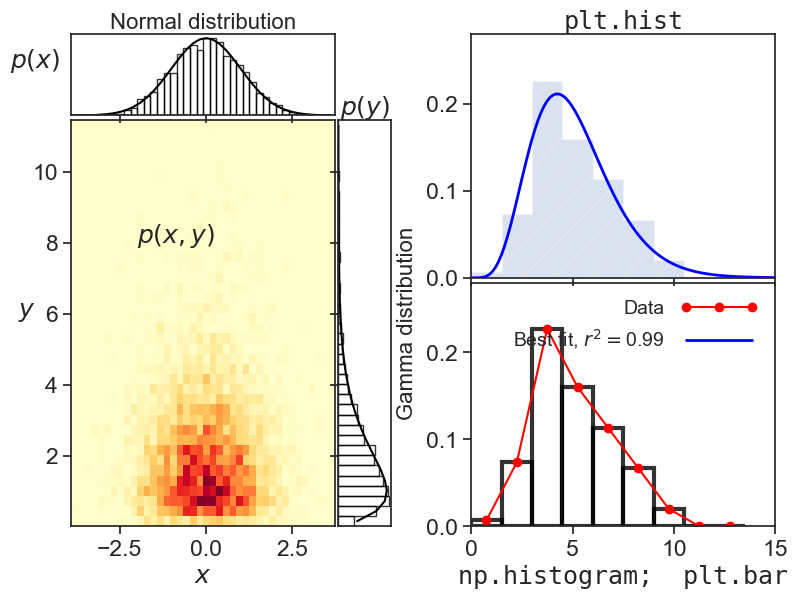

In [4]:
fig = plt.figure(1, figsize=(8,6))  # figsize accepts only inches.

##################################
# Panels on the left of the figure
##################################

gs = gridspec.GridSpec(2, 2, width_ratios=[1, 0.2], height_ratios=[0.2, 1])
gs.update(left=0.10, right=0.50, top=0.95, bottom=0.13,
          hspace=0.02, wspace=0.02)

sigma = 1.0  # standard deviation (spread)
mu = 0.0  # mean (center) of the distribution
x = np.random.normal(loc=mu, scale=sigma, size=5000)
k = 2.0  # shape
theta = 1.0  # scale
y = np.random.gamma(shape=k, scale=theta, size=5000)

# bottom left panel
ax10 = plt.subplot(gs[1, 0])
counts, xedges, yedges, image = ax10.hist2d(x, y, bins=40, cmap="YlOrRd",
                                            density=True)
dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
xvec = xedges[:-1] + dx / 2
yvec = yedges[:-1] + dy / 2
ax10.set_xlabel(r"$x$")
ax10.set_ylabel(r"$y$", rotation="horizontal")
ax10.text(-2, 8, r"$p(x,y)$")
ax10.set_xlim([xedges.min(), xedges.max()])
ax10.set_ylim([yedges.min(), yedges.max()])

# top left panel
ax00 = plt.subplot(gs[0, 0])
gaussian = (1.0 / np.sqrt(2.0 * np.pi * sigma ** 2)) * \
    np.exp(-((xvec - mu) ** 2) / (2.0 * sigma ** 2))
xdist = counts.sum(axis=1) * dy
ax00.bar(xvec, xdist, width=dx, fill=False,
         edgecolor='black', alpha=0.8)
ax00.plot(xvec, gaussian, color='black')
ax00.set_xlim([xedges.min(), xedges.max()])
ax00.set_xticklabels([])
ax00.set_yticks([])
ax00.set_xlabel("Normal distribution", fontsize=16)
ax00.xaxis.set_label_position("top")
ax00.set_ylabel(r"$p(x)$", rotation="horizontal", labelpad=20)

# bottom right panel
ax11 = plt.subplot(gs[1, 1])
gamma_dist = yvec ** (k - 1.0) * np.exp(-yvec / theta) / \
    (theta ** k * scipy.special.gamma(k))
ydist = counts.sum(axis=0) * dx
ax11.barh(yvec, ydist, height=dy, fill=False,
          edgecolor='black', alpha=0.8)
ax11.plot(gamma_dist, yvec, color='black')
ax11.set_ylim([yedges.min(), yedges.max()])
ax11.set_xticks([])
ax11.set_yticklabels([])
ax11.set_ylabel("Gamma distribution", fontsize=16)
ax11.yaxis.set_label_position("right")
ax11.set_xlabel(r"$p(y)$")
ax11.xaxis.set_label_position("top")

###################################
# Panels on the right of the figure
###################################

gs2 = gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[1, 1])
gs2.update(left=0.60, right=0.98, top=0.95, bottom=0.13,
           hspace=0.02, wspace=0.05)

x = np.random.normal(loc=0, scale=1, size=1000)
y = np.random.gamma(shape=2, size=1000)

bx10 = plt.subplot(gs2[1, 0])
bx00 = plt.subplot(gs2[0, 0])

N = 100
a = np.random.gamma(shape=5, size=N)
my_bins = np.arange(0,15,1.5)
n1, bins1, patches1 = bx00.hist(a, bins=my_bins, density=True,
                                histtype='stepfilled', alpha=0.2, hatch='/')
bx00.set_xlim([0, 15])
bx00.set_ylim([0, 0.28])
bx00.set_xticklabels([])
bx00.set_xlabel("plt.hist", fontfamily="monospace")
bx00.xaxis.set_label_position("top")

# the following way is equivalent to plt.hist, but it gives
# the user more flexibility when plotting and analysing the results
n2, bins2 = np.histogram(a, bins=my_bins, density=True)
wid = bins2[1] - bins2[0]
red, = bx10.plot(bins2[:-1]+wid/2, n2, marker='o', color='red')
bx10.bar(bins2[:-1], n2, width=wid, fill=False,
         edgecolor='black', linewidth=3, alpha=0.8, align="edge")
bx10.set_xlim([0, 15])
bx10.set_ylim([0, 0.28])
bx10.set_xlabel(r"np.histogram;  plt.bar", fontfamily="monospace")

# best fit

xdata = my_bins[:-1] + wid/2
ydata = n2
def func(x, p1, p2):
    return x ** (p1 - 1.0) * np.exp(-x / p2) / (p2 ** p1 * scipy.special.gamma(p1))
popt, pcov = curve_fit(func, xdata, ydata, p0=(1.5, 1.5))  # p0 = initial guess
p1, p2 = popt
SStot = ((ydata - ydata.mean()) ** 2).sum()
SSres = ((ydata - func(xdata, p1, p2)) ** 1).sum()
Rsquared = 1 - SSres / SStot
h = np.linspace(0,15,101)
bx00.plot(h, func(h, p1, p2), color='blue', linewidth=2)
# dummy plot, just so we can have a legend on the bottom panel
blue, = ax10.plot([100],[100], color='blue', linewidth=2, label="Best fit")
bx10.legend([red,blue],[r'Data',r'Best fit, $r^2=${:.2f}'.format(Rsquared)],
            loc='upper right', frameon=False, handlelength=4,
            markerfirst=False, numpoints=3, fontsize=14)

fig.savefig("histograms.png",dpi=300)